In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

# 영화 리뷰 분류: 이진 분류 예제

This notebook contains the code samples found in Chapter 3, Section 5 of [Deep Learning with Python](https://www.manning.com/books/deep-learning-with-python?a_aid=keras&a_bid=76564dff). Note that the original text features far more content, in particular further explanations and figures: in this notebook, you will only find source code and related comments.

----


Two-class classification, or binary classification, may be the most widely applied kind of machine learning problem. In this example, we 
will learn to classify movie reviews into "positive" reviews and "negative" reviews, just based on the text content of the reviews.

## The IMDB dataset

<img src = "https://www.imdb.com/?ref_=nv_home">

link : https://www.imdb.com

We'll be working with "IMDB dataset", a set of 50,000 highly-polarized reviews from the Internet Movie Database. They are split into 25,000 
reviews for training and 25,000 reviews for testing, each set consisting in 50% negative and 50% positive reviews.

**Why do we have these two separate training and test sets? You should never test a machine learning model on the same data that you used to 
train it! Just because a model performs well on its training data doesn't mean that it will perform well on data it has never seen, and 
what you actually care about is your model's performance on new data (since you already know the labels of your training data -- obviously 
you don't need your model to predict those).**

Just like the MNIST dataset, the IMDB dataset comes packaged with Keras. It has already been preprocessed: the reviews (sequences of words) 
have been turned into sequences of integers, where each integer stands for a specific word in a dictionary.

The following code will load the dataset (when you run it for the first time, about 80MB of data will be downloaded to your machine):

In [2]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 2s 0us/step


**num_words = 10000 매개변수는 훈련 데이터에서 가장 자주 나타나는 단어 1만개만 사용. 드물게 나타나는 단어는 무시.  **

The variables `train_data` and `test_data` are lists of reviews, each review being a list of word indices (encoding a sequence of words). 
`train_labels` and `test_labels` are lists of 0s and 1s, where 0 stands for "negative" and 1 stands for "positive":

**변수 train_data와 test_data는 리뷰의 목록. <br>**
각 리뷰는 단어 인덱스의 리스트 (단어 시퀀스가 인코딩 된 것)) <br>
train_labels와 test_labels는 **부정**을 나타내는 0과 **긍정**을 나타내는 1의 리스트임.  <br>

In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
train_labels[0]

1

자주 등장하는 단어 1만개로 제한했기 때문에 인덱스는 10,000을 넘지 않는 것을 확인할 수 있다. 

In [5]:
max([max(sequence) for sequence in train_data])

9999

For kicks, here's how you can quickly decode one of these reviews back to English words:

리뷰를 다시 영어로 번역하고 싶을 때는: 

In [6]:
# word_index is a dictionary mapping words to an integer index
# word_index는 단어와 정수 인덱스를 매핑한 딕셔너리 
word_index = imdb.get_word_index()
# We reverse it, mapping integer indices to words
# 정수 인덱스와 단어를 매핑하도록 뒤집는다. 
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# We decode the review; note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
# 리뷰를 디코딩한다. 0,1,2는 '패딩', '문서 시작', '사전에 없음'을 위한 인덱스이므로 3을 뺌.
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

1646592/1641221 [==============================] - 2s 1us/step


In [7]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

## 데이터 준비

신경망에 숫자 리스트를 주입할 수는 없음. 리스트 -> 텐서로 바꿈. 

1) 같은 길이가 되도록 리스트에 패딩(padding)을 추가하고 (samples, sequence_length)크기의 정수 텐서로 변환. 그 다음 이 정수 텐서를 다룰 수 있는 층을 신경망의 첫 번째 층으로 사용

2) 리스트를 원핫인코딩하여 0과 1의 벡터로 변환한다. 예를 들어 시퀀스 [3,5]를 인덱스 3과 5의 위치는 1이고 그 외는 모두 0인 10,000차원의 벡터로 각각 변환한다. 그 다음 부동 소수 벡터 데이터를 다룰 수 있는 Dense층을 신경망의 첫 번째 층으로 사용한다. 

여기서는 2번째 방식을 사용하고 이해를 돕기 위해 직접 데이터를 원-핫 벡터로 만듦.

In [0]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    # 크기가  len(sequences),dimension)이고 모든 원소가 0인 행렬을 만듦
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
        #results[i]에서 특정 인덱스의 위치를 1로 만듦
    return results

# Our vectorized training data #훈련 데이터를 벡터로 변환
x_train = vectorize_sequences(train_data)
# Our vectorized test data #테스트 데이터를 벡터로 변환
x_test = vectorize_sequences(test_data)

Here's what our samples look like now:

In [9]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

레이블은 쉽게 벡터로 바꿀 수 있음. 

In [0]:
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

데이터 준비 완료

## Building our network
## 신경망 모델 만들기

**입력 데이터가 벡터, 레이블은 스칼라 (1 또는 0)임. 앞으로 볼 수 있는 문제 중에서 가장 간단한 형태. 이런 문제에 잘 작동하는 네트워크 종류는 relu 활성화 함수를 사용한 완전 연결 층(즉  Dense(16,activation='relu'))를 그냥 쌓은 것임. **

**Dense 층에 전달한 매개변수(16)는 은닉 유닛(hidden unit)의 개수임. 하나의 은닉 유닛은 층이 나타내는 표현 공간에서 하나의 차원이 됨. 2장에서 relu 활성화 함수를 사용한 Dense층을 다음 텐서 연산을 연결하여 구현함.**

`output = relu(dot(W, input) + b)`

** 16개의 은닉 유닛이 있다는 것은 가중치 행렬 W의 크기가 (input_dimension, 16)이라는 뜻**

Having 16 hidden units means that the weight matrix `W` will have shape `(input_dimension, 16)`, i.e. the dot product with `W` will project the 
input data onto a 16-dimensional representation space (and then we would add the bias vector `b` and apply the `relu` operation). You can 
intuitively understand the dimensionality of your representation space as "how much freedom you are allowing the network to have when 
learning internal representations". Having more hidden units (a higher-dimensional representation space) allows your network to learn more 
complex representations, but it makes your network more computationally expensive and may lead to learning unwanted patterns (patterns that 
will improve performance on the training data but not on the test data).

There are two key architecture decisions to be made about such stack of dense layers: <br>

**Dense 층을 쌓을 때 2가지 중요한 구조상의 결정이 필요함**

* How many layers to use. 얼마나 많은 층을 사용할 것인가? 
* How many "hidden units" to chose for each layer. 각 층에 얼마나 많은 은닉 유닛을 둘 것인가?

**4장에서 자세한 원리를 배울 예정이지만, 우선은 이렇게 가보자. 
16개의 은닉 유닛을 가진 2개의 은닉 층
현재 리뷰의 감정을 스칼라 값의 예측으로 출력하는 3번째 층**

In the next chapter, you will learn formal principles to guide you in making these choices. 
For the time being, you will have to trust us with the following architecture choice: 
two intermediate layers with 16 hidden units each, and a third layer which will output the scalar prediction regarding the sentiment of the current review. 

The intermediate layers will use **`relu`** as their "activation function",
and the final layer will use a sigmoid activation so as to output a probability (a score between 0 and 1, indicating how likely the sample is to have the target "1", i.e. how likely the review is to be positive). 

A `relu` (rectified linear unit) is a function meant to zero-out negative values, 
while a sigmoid "squashes" arbitrary values into the `[0, 1]` interval, thus outputting something that can be interpreted as a probability.

**중간에 있는 은닉 층은 활성화 함수로 relu를 사용하고 마지막 층은 확률(0과 1사이의 점수로, 어떤 샘플이 타깃 '1'일 가능성이 높다는 것은 그 리뷰가 긍정일 가능성이 높다는 것을 의미함)을 출력하기 위해 시그모이드 활성화 함수 사용. relu는 음수를 0으로 만드는 함수. 시그모이드는 임의의 값을 [0,1] 사이로 압축하므로 출력 값을 확률 처럼 해석 가능.**

Here's what our network looks like:

## 3개의 층으로 된 신경망

![3-layer network](https://s3.amazonaws.com/book.keras.io/img/ch3/3_layer_network.png)

And here's the Keras implementation, very similar to the MNIST example you saw previously:

그림 3-6에서 이 신경망을 보여줌. 다음은 이 신경망의 케라스 구현임. 이전에 보았던 MNIST 예제와 비슷함. (챕터 2-1.예제 참조)

In [11]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


**마지막으로 손실 함수와 옵티마이저 선택해야함. 
이진 분류 문제고 신경망의 출력이 확률이기 때문에 binary_crossentropy 손실이 적합. (mean_squared_error도 사용 가능함)
확률을 출력하는 모델을 사용할 때는 크로스엔트로피가 최선의 선택. (정보 이론 분야에서 온 개념으로, 확률 분포 간의 차이를 측정)
여기서는 원본 분포와 예측 분포 사이를 측정. **

다음은 rmsprop옵티마이저와binary_Crossentropy손실함수로 모델을 설정하는 단계임. 훈련하는 동안 정확도를 사용하여 모니터링할 예정. 

**케라스에 rmsprop, binary_crossentropy, accuracy가 포함되어있기 때문에 옵티마이저, 손실 함수, 측정 지표를 문자열로 지정하는 것이 가능함. 이따금 옵티마이저의 매개변수를 바꾸거나 자신만의 손실 함수, 측정 함수를 전달해야할 경우가 있음. 전자의 경우에는 아래와 같이 옵티마이저 파이썬 클래스를 사용해서 객체를 직접 만들어 optimizer 매개 변수에 전달하면 됨.**

We are passing our optimizer, loss function and metrics as strings, which is possible because `rmsprop`, `binary_crossentropy` and 
`accuracy` are packaged as part of Keras. Sometimes you may want to configure the parameters of your optimizer, or pass a custom loss 
function or metric function. This former can be done by passing an optimizer class instance as the `optimizer` argument:

In [0]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

The latter can be done by passing function objects as the `loss` or `metrics` arguments:
후자의 경우에는 loss와 metrics  매개 변수에 함수 객체를 전달하면 됨. 

In [0]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

## 3.4.4 훈련 검증

훈련하는 동안 처음 본 데이터에 대한 모델의 정확도를 측정하기 위해서는 원본 훈련 데이터에서 10,000의 샘플을 떼어 검증 세트를 만들어야 함. ("validated set")

In [0]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [0]:
#모델 컴파일하기
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

**이제 모델을 512개의 샘플씩 미니 배치를 만들어 20번의 에포크 동안 훈련시킴 (x_train과 y_train 텐서에 있는 모든 샘플에 대해 20번 반복)**

**동시에 따로 떼어 놓은 1만 개의 샘플에서 손실과 정확도를 측정. 이렇게 하려면 validation_data 매개 변수에 검증 데이터를 전달.**

On CPU, this will take less than two seconds per epoch -- training is over in 20 seconds. At the end of every epoch, there is a slight pause 
as the model computes its loss and accuracy on the 10,000 samples of the validation data.

model.fit() 메서드는 History 객체를 반환함. 이 객체는 훈련하는 동안 발생한 모든 정보를 담고 있는 딕셔너리인 history 속성을 가지고 있음. 

    history_dict = history.history
    history_dict.keys()

In [17]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 179us/step - loss: 0.5042 - acc: 0.7887 - val_loss: 0.3776 - val_acc: 0.8707
Epoch 2/20
15000/15000 [==============================] - 2s 131us/step - loss: 0.2991 - acc: 0.9047 - val_loss: 0.3001 - val_acc: 0.8898
Epoch 3/20
15000/15000 [==============================] - 2s 132us/step - loss: 0.2173 - acc: 0.9283 - val_loss: 0.3080 - val_acc: 0.8715
Epoch 4/20
15000/15000 [==============================] - 2s 132us/step - loss: 0.1748 - acc: 0.9437 - val_loss: 0.2822 - val_acc: 0.8850
Epoch 5/20
15000/15000 [==============================] - 2s 132us/step - loss: 0.1422 - acc: 0.9542 - val_loss: 0.2856 - val_acc: 0.8856
Epoch 6/20
15000/15000 [==============================] - 2s 131us/step - loss: 0.1148 - acc: 0.9649 - val_loss: 0.3146 - val_acc: 0.8777
Epoch 7/20
15000/15000 [==============================] - 2s 132us/step - 

In [0]:
history_dict = history.history

In [19]:
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

It contains 4 entries: one per metric that was being monitored, during training and during validation. Let's use Matplotlib to plot the 
training and validation loss side by side, as well as the training and validation accuracy:

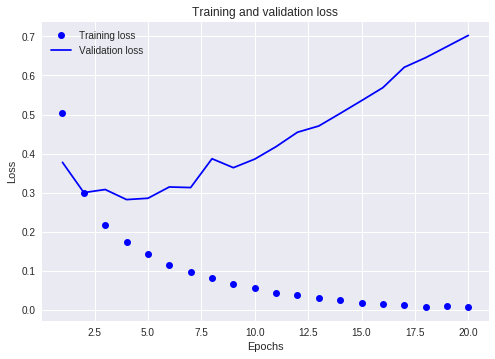

In [20]:
#훈련과 검증 손실 그리기 
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

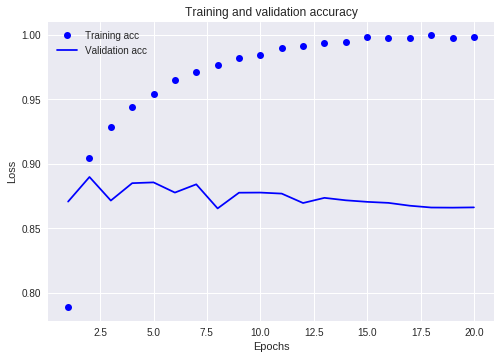

In [21]:
#훈련과 검증 정확도 그리기 

plt.clf()   # clear figure 그래프 초기화
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


경사 하강법 최적화를 사용했을 때 반복마다 손실을 최소화하므로 훈련 손실이 에포크마다 감소하고 훈련 정확도는 에포크마다 증가함. 검증 손실과 정확도는 이와 같지 않음. 4번째 에포크에서 그래프가 역전되는 것을 볼 수 있음. => 과대적합(overfitting)
2번째 에포크 이후부터 훈련 데이터에 과도하게 최적화되어 훈련 데이터에 특화된 표현을 학습하므로 훈련 세트 이외의 데이터에는 일반화되지 못함. 
이런 경우 오버피팅 방지를 위해 3번째 에포크 이후에 훈련을 중지할 수 있음. (자세한건 4장에서. )

처음부터 다시 새로운 신경망을 4번째 에포크 동안만 훈련하고 테스트 데이터에서 평가해보자. 

Let's train a new network from scratch for four epochs, then evaluate it on our test data:

In [22]:
#모델을 처음부터 다시 훈련하기 
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 3s 103us/step - loss: 0.4742 - acc: 0.8213
Epoch 2/4
25000/25000 [==============================] - 2s 96us/step - loss: 0.2677 - acc: 0.9092
Epoch 3/4
25000/25000 [==============================] - 2s 93us/step - loss: 0.2033 - acc: 0.9284
Epoch 4/4
25000/25000 [==============================] - 2s 71us/step


In [23]:
#최종 결과 
results

[0.3113991069126129, 0.8762]

단순한 방식으로도 87%정확도 달성. 최고 수준의 기법을 사용하면 95%에 가까운 성능도 얻을 수 있음. 
Our fairly naive approach achieves an accuracy of 88%. With state-of-the-art approaches, one should be able to get close to 95%.

## 훈련된 모델로 새로운 데이터에 대해 예측하기

모델을 훈련시킨 후에 이를 실전 환경에서 사용하고 싶을 것임. predict 메서드를 사용해서 어떤 리뷰가 긍정일 확률을 예측할 수 있음. (레이블이 1일 확률)
After having trained a network, you will want to use it in a practical setting. You can generate the likelihood of reviews being positive 
by using the `predict` method:

In [24]:
model.predict(x_test)

array([[0.16346872],
       [0.99985474],
       [0.39974073],
       ...,
       [0.08230051],
       [0.05029902],
       [0.45043465]], dtype=float32)

위와 같이 이 모델은 어떤 샘플에 대해 확신을 가지고 있지만 (0.99 또는 그 이상, 0.01 또는 그 이하) 어떤 샘프에 대해서는 확신이 부족함 (0.6, 0.4)

## Further experiments


* We were using 2 hidden layers. Try to use 1 or 3 hidden layers and see how it affects validation and test accuracy.
* Try to use layers with more hidden units or less hidden units: 32 units, 64 units...
* Try to use the `mse` loss function instead of `binary_crossentropy`.
* Try to use the `tanh` activation (an activation that was popular in the early days of neural networks) instead of `relu`.

These experiments will help convince you that the architecture choices we have made are all fairly reasonable, although they can still be 
improved!

## 정리 

- 원본 데이터를 신경망에 텐서로 주입하기 위해서는 꽤 많은 전처리가 필요. 단어 시퀀스는 이진 벡터로 인코딩 될 수 있고, 다른 인코딩 방식도 있음. 
- relu 활성화 함수와 함께 Dense 층을 쌓은 네트워크는 (감성 분류를 포함) 여러 종류의 문제에 적용할 수 있음. 앞으로 자주 사용하게 될 것임. 
- (출력 클래스가 2개인) 이진 분류 문제에서 네트워크는 하나의 유닛과 sigmoid활성화 함수를 가진 Dense 층으로 끝나야 함. 이 신경망의 출력은 확률을 나타내는 0과 1사이의 스칼라 값. 
- 이진 분류 문제에서 이런 스칼라 시그모이드 출력에 대해 사용할 손실 함수는 binary_crossentropy임. 
- rmsprop 옵티마이저는 문제에 상관없이 일반적으로 충분히 좋은 선택. 